In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def Image_Show(image,title):
    plt.subplot(2,2,1),plt.imshow(image,'gray')
    plt.title(title)
    plt.xticks([]),plt.yticks([])
    plt.show()

In [3]:
def Binary_Thresholding(img_gray):
    ret, img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY) #apply binary threshold
    #cv2.imwrite('image_thres1.jpg', thresh)
    return img_thresh

In [4]:
def adap_hist_equi(img):# create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    #cv.imwrite('clahe_2.jpg',cl1)
    return cl1

In [5]:
def binary_color_reverse(img_input):
    img_col_rev=np.where(img_input == 255, 1,img_input )
    img_col_rev=np.where(img_col_rev == 0, 255,img_col_rev )
    img_col_rev=np.where(img_col_rev == 1, 0,img_col_rev )
    return img_col_rev

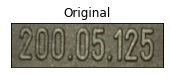

In [6]:
img = cv2.imread('train.png')
Image_Show(img,'Original')

##### Delete below

In [7]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

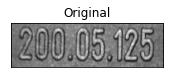

In [8]:
Image_Show(hsv_img[:,:,2],'Original')

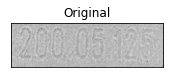

In [9]:
Image_Show(hsv_img[:,:,0],'Original')

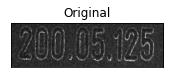

In [10]:
Image_Show(hsv_img[:,:,1],'Original')

In [11]:
len(np.unique(hsv_img[:,:,0]))

68

In [12]:
(np.unique(hsv_img[:,:,2]))

array([ 22,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 200, 203, 204,
       205], dtype=uint8)

In [13]:
thresh = 90
img_binary = cv2.threshold((hsv_img[:,:,2]), thresh, 255, cv2.THRESH_BINARY)[1]

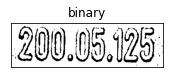

In [14]:
Image_Show(img_binary,'binary')

##### delete above

In [74]:
cl1 =adap_hist_equi(img) #adaptive histo equilization

In [75]:
#Image_Show(cl1,'Adaptive_Hist_Equi') #to show the image and hist plot
#plt.hist(cl1.ravel(),256,[0,256]); plt.show()

In [76]:
cv2.imwrite('Adap_hist_equ.jpg',cl1)

True

In [77]:
#img = cv2.imread('Adap_hist_equ.jpg')    
img_gray = cl1#cv2.imread('Adap_hist_equ.jpg',0)
#Image_Show(img,'Original'),Image_Show(img_gray,'Grayscale')

In [78]:
img_thresh_post_adap_hist=Binary_Thresholding(img_gray)#applying binary thresholding
#Image_Show(img_thresh_post_adap_hist,'Original_thresh_img_thresh_post_adap_hist')

In [79]:
img_col_reversed=binary_color_reverse(img_thresh_post_adap_hist) #reversing the binary colors

In [80]:
#np.unique(img_thresh_post_adap_hist)

In [81]:
#Image_Show(img_test,'Thresh')

In [82]:
cv2.imwrite('img_color_reversed.jpg',img_col_reversed)

True

In [83]:
image = cv2.imread('img_color_reversed.jpg')
#Image_Show(image,'test')

In [40]:
# Load image, grayscale, Otsu's threshold
image = cv2.imread('img_color_reversed.jpg')
gray =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Filter out large non-connecting objects
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 70:
        cv2.drawContours(thresh,[c],0,0,-1)

# Morph open using elliptical shaped kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)

# Find circles 
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area > 20 and area < 20:
        ((x, y), r) = cv2.minEnclosingCircle(c)
        cv2.circle(image, (int(x), int(y)), int(r), (36, 255, 12), 2)

#cv2.imshow('thresh', thresh)
#cv2.imshow('opening', opening)
#cv2.imshow('image', image)
#cv2.waitKey()

In [36]:
#Image_Show(thresh,'Thresh')
#np.unique(thresh)

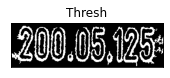

In [37]:
Image_Show(thresh,'Thresh')

In [38]:
img_final=binary_color_reverse(thresh) #reversing the binary colors

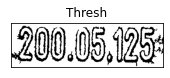

In [39]:
Image_Show(img_final,'Thresh')

In [89]:
cv2.imwrite('Image_to_tessaract.jpg',img_final)

True